
# Predict Income using US Census Data

**Data Set Information**

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker. The prediction task is to determine whether a person makes over $50K a year.

**Relevant papers**

Ron Kohavi, ["Scaling Up the Accuracy of Naive-Bayes Classifiers: a Decision-Tree Hybrid"][1], *Proceedings of the Second International Conference on Knowledge Discovery and Data Mining*, 1996. (PDF)

  [1]: http://robotics.stanford.edu/~ronnyk/nbtree.pdf

**Attribute Information**


>50K, <=50K. 

1. age: continuous. 

1. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 

1. fnlwgt: continuous. 

1. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 
12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 

1. education-num: continuous. 

1. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 

1. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 

1. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 

1. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 

1. sex: Female, Male. 

1. capital-gain: income from investment sources, apart from wages/salary.. 

1. capital-loss: losses from investment sources, apart from wages/salary. 

1. hours-per-week: continuous. 

1. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



Load Libraries

In [1]:
#library(tidyverse)
library(plotly)
library(grid)
library(gridExtra)
library(DataExplorer)
library(countrycode)
library(rworldmap)
library(caret)
library(rpart)
library(rpart.plot)
library(randomForest)
library(xgboost)
library(ggplot2)
library(caret)
library(dummies)
library(e1071)
library(ranger)
library(keras)
library(tensorflow)
library(parallelSVM)
library(Metrics)

Warning message:
"package 'plotly' was built under R version 3.4.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.4.4"
Attaching package: 'plotly'

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout

Warning message:
"package 'gridExtra' was built under R version 3.4.3"Warning message:
"package 'DataExplorer' was built under R version 3.4.3"Warning message:
"package 'countrycode' was built under R version 3.4.4"Warning message:
"package 'rworldmap' was built under R version 3.4.4"Loading required package: sp
Warning message:
"package 'sp' was built under R version 3.4.3"### Welcome to rworldmap ###
For a short introduction type : 	 vignette('rworldmap')
Warning message:
"package 'caret' was built under R version 3.4.3"Loading required package: lattice
Warning message:
"package 'rpart.

In [2]:
setcol <- c("age","workclass","fnlwgt","education","education-num","marital-status",
            "occupation","relationship","race","sex","capital-gain","capital-loss",
            "hours-per-week","native-country","target")
#load data
adult <- read.table("~/Desktop/Predict-Income-using-US-Census-Data/adult.data.txt",header = F,
                    sep = ",",col.names = setcol,na.strings = c(" ?"),stringsAsFactors = F)
head(adult)

age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
str(adult)

'data.frame':	32561 obs. of  15 variables:
 $ age           : int  39 50 38 53 28 37 49 52 31 42 ...
 $ workclass     : chr  " State-gov" " Self-emp-not-inc" " Private" " Private" ...
 $ fnlwgt        : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education     : chr  " Bachelors" " Bachelors" " HS-grad" " 11th" ...
 $ education.num : int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital.status: chr  " Never-married" " Married-civ-spouse" " Divorced" " Married-civ-spouse" ...
 $ occupation    : chr  " Adm-clerical" " Exec-managerial" " Handlers-cleaners" " Handlers-cleaners" ...
 $ relationship  : chr  " Not-in-family" " Husband" " Not-in-family" " Husband" ...
 $ race          : chr  " White" " White" " White" " Black" ...
 $ sex           : chr  " Male" " Male" " Male" " Male" ...
 $ capital.gain  : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital.loss  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hours.per.week: int  40 13 40 40 40 40 16 45 50 40 ...
 $ native.countr

In [4]:
dim(adult)

[1] 32561    15

In [5]:
summary(adult)


      age         workclass             fnlwgt         education        
 Min.   :17.00   Length:32561       Min.   :  12285   Length:32561      
 1st Qu.:28.00   Class :character   1st Qu.: 117827   Class :character  
 Median :37.00   Mode  :character   Median : 178356   Mode  :character  
 Mean   :38.58                      Mean   : 189778                     
 3rd Qu.:48.00                      3rd Qu.: 237051                     
 Max.   :90.00                      Max.   :1484705                     
 education.num   marital.status      occupation        relationship      
 Min.   : 1.00   Length:32561       Length:32561       Length:32561      
 1st Qu.: 9.00   Class :character   Class :character   Class :character  
 Median :10.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :10.08                                                           
 3rd Qu.:12.00                                                           
 Max.   :16.00                               

In [6]:
colSums(sapply(adult,is.na))

age      workclass         fnlwgt      education  education.num 
             0           1836              0              0              0 
marital.status     occupation   relationship           race            sex 
             0           1843              0              0              0 
  capital.gain   capital.loss hours.per.week native.country         target 
             0              0              0            583              0

In [7]:
sum(!complete.cases(adult))

[1] 2399

In [8]:
# % of Missing Values
sum(is.na(adult)) / (nrow(adult) *ncol(adult))


[1] 0.008726186

In [9]:
# Check for duplicated rows.

cat("The number of duplicated rows are", nrow(adult) - nrow(unique(adult)))

The number of duplicated rows are 24

In [21]:
adult_omitted <- na.omit(adult)
colSums(sapply(adult_omitted,is.na))


age      workclass         fnlwgt      education  education.num 
             0              0              0              0              0 
marital.status     occupation   relationship           race            sex 
             0              0              0              0              0 
  capital.gain   capital.loss hours.per.week native.country         target 
             0              0              0              0              0

In [11]:
tmp_df <- adult[!duplicated(adult), ]
dim(tmp_df)

[1] 32537    15

## EDA & Visualization

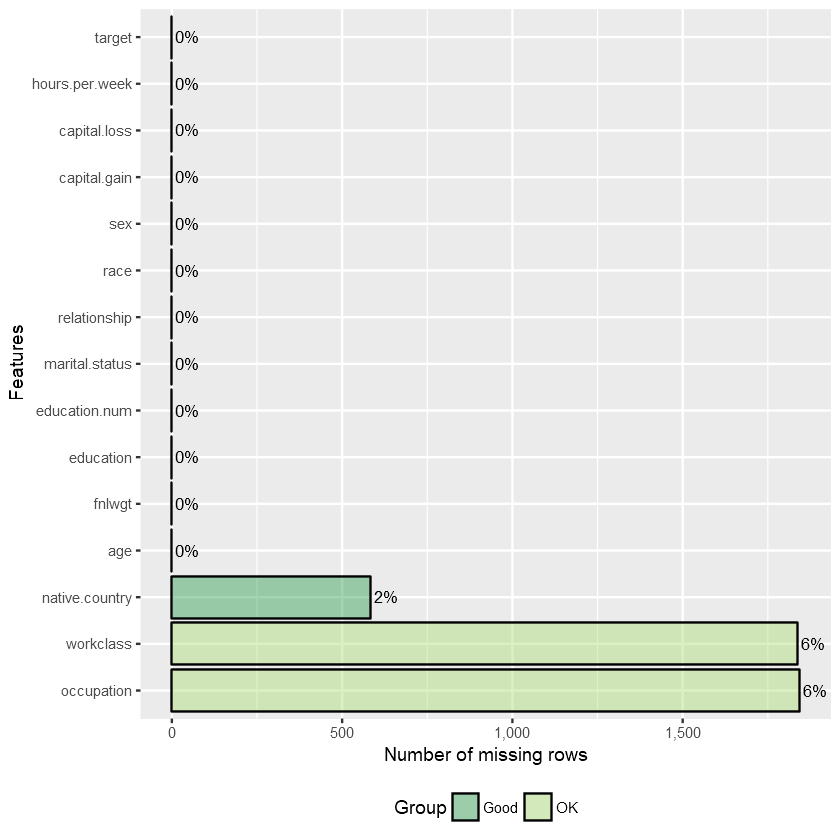

In [13]:
plot_missing(adult)

**Correlation Map between attributes**

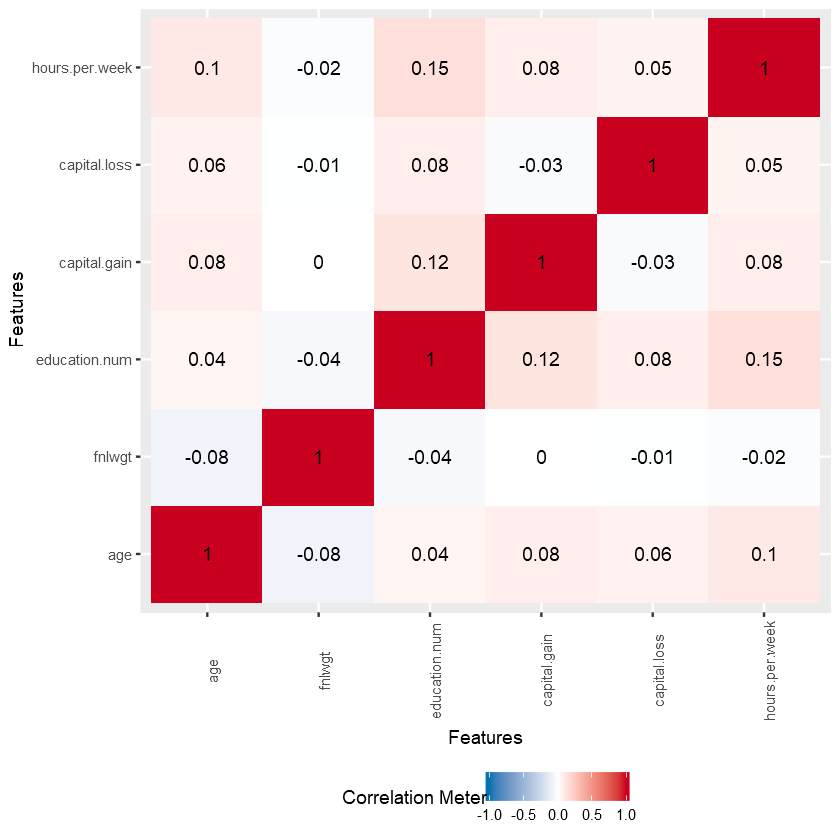

In [17]:
plot_correlation(adult, type = 'continuous','Review.Date')

In [61]:
#plot_histogram(adult)

In [62]:
#plot_bar(adult)

In [63]:
#plot_density(adult)

### *Continuous Features*

#### **Age** 

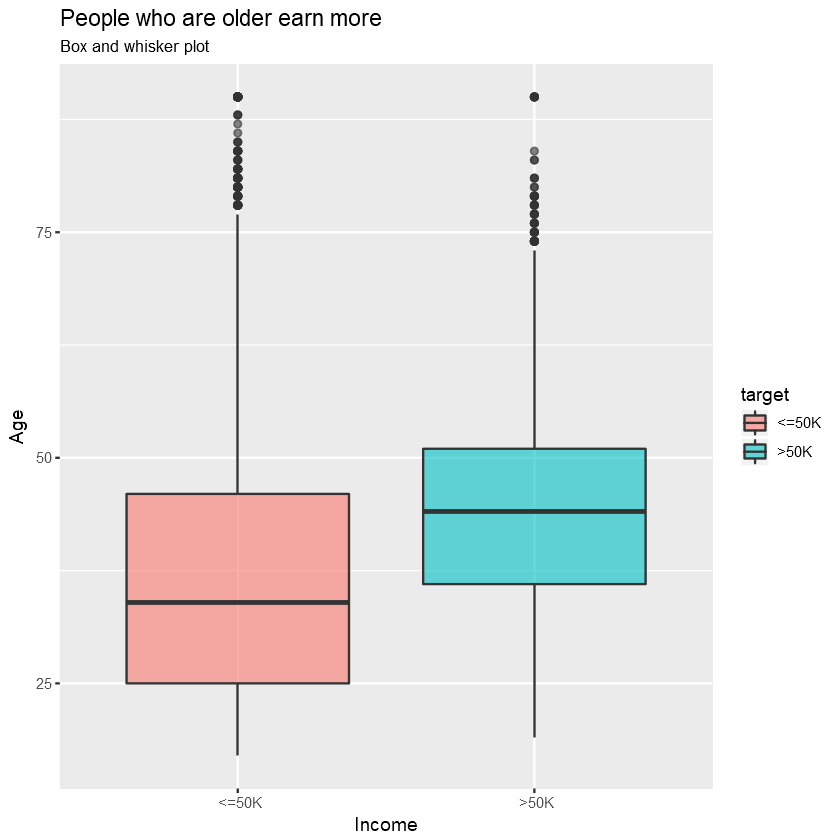

In [52]:
age_box <- ggplot(adult, aes(x = target, y = age, fill = target)) +
   geom_boxplot(alpha = 0.6) +
   labs(x = "Income", y = "Age", title = "People who are older earn more",
        subtitle = "Box and whisker plot")

age_box

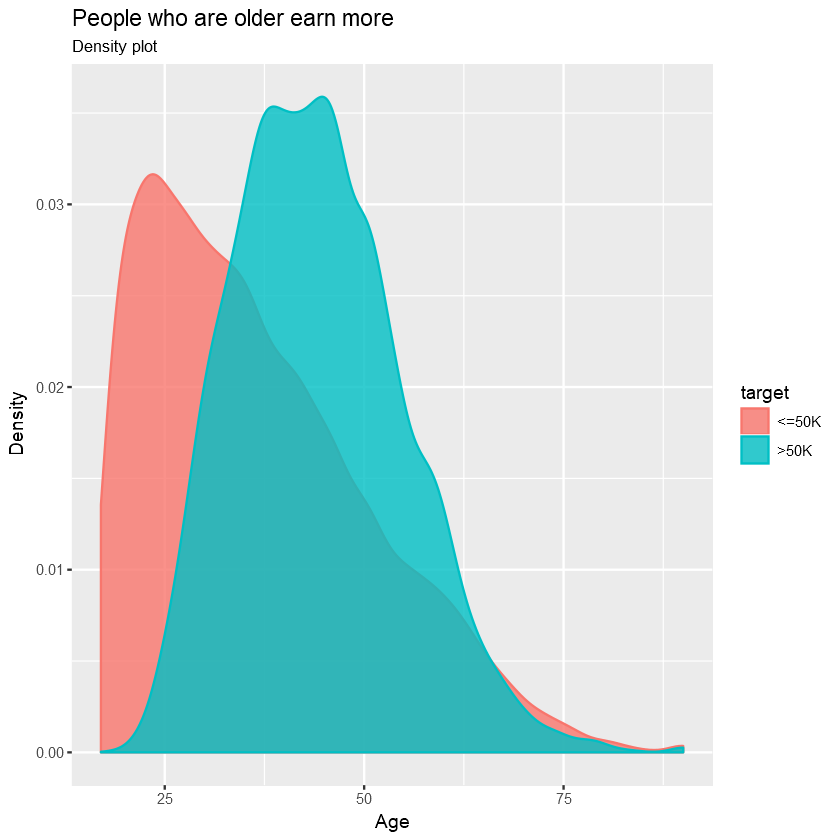

In [53]:
age_density <- ggplot(adult, aes(x = age, color = target, fill = target)) + geom_density(alpha = 0.8) +
   labs(x = "Age", y = "Density", title = "People who are older earn more",
        subtitle = "Density plot")
age_density

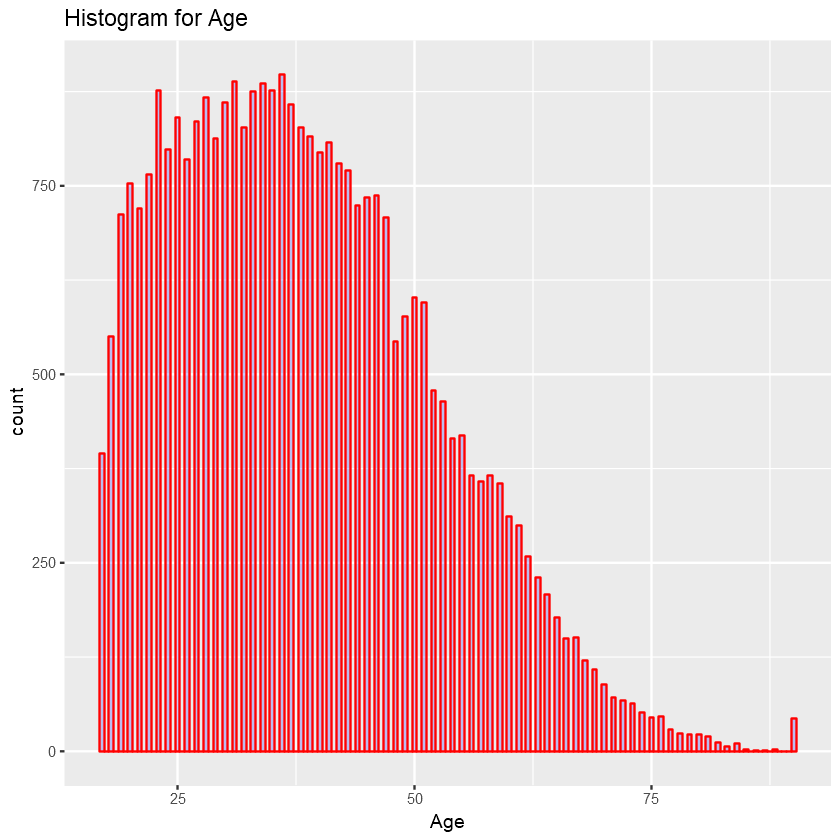

In [40]:
qplot(adult$age,
      geom="histogram",
      binwidth = 0.5,  
      main = "Histogram for Age", 
      xlab = "Age",  
      fill=I("blue"), 
      col=I("red"), 
      alpha=I(.2))


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


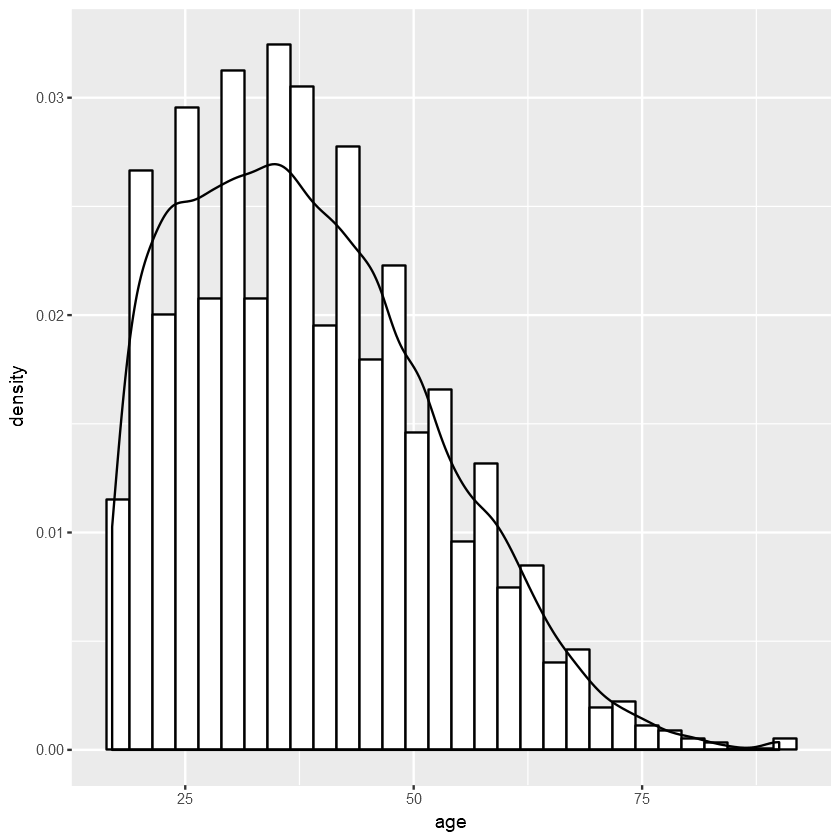

In [76]:
ggplot(adult, aes(x = age)) + 
  geom_histogram(aes(y=..density..),
                 colour="black", fill="white") +
  geom_density()  

#### **Capital Loss**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


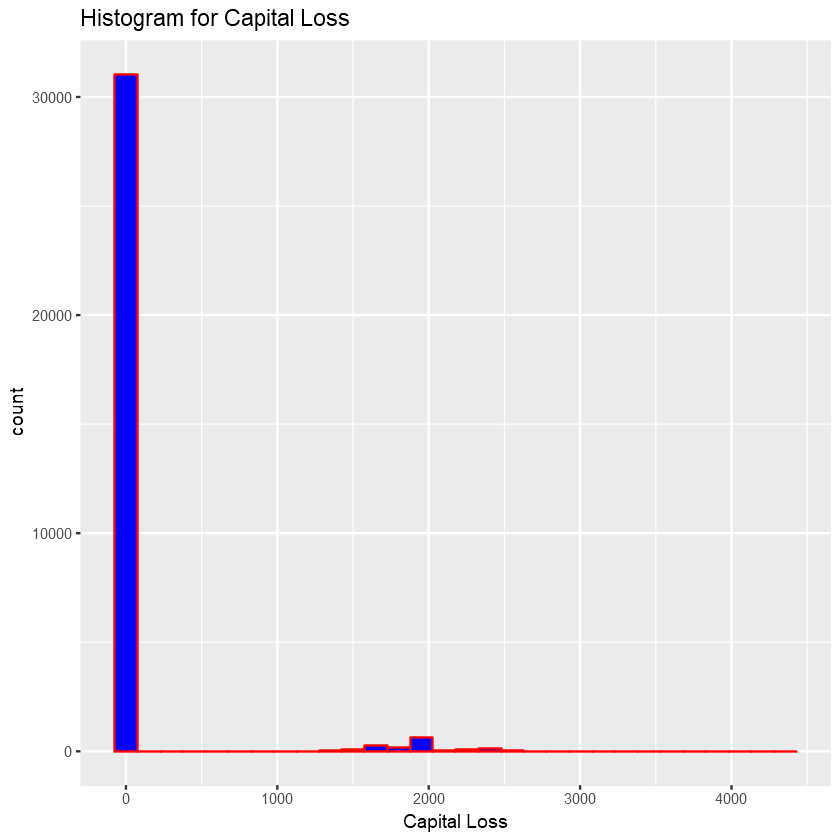

In [55]:
loss_plot <- qplot(adult$capital.loss,
      geom="histogram",  
      main = "Histogram for Capital Loss", 
      xlab = "Capital Loss",  
      fill=I("blue"), 
      col=I("red"))

loss_plot
#grid.arrange(loss_plot, gain_plot, ncol = 2, main = "Histogram for Capital Loss and Captial Gain")

#qplot(CapitalLoss, data=df, geom="histogram")+theme_bw()+ggtitle('Histogram of Capital Loss')

We Can avoid this Skewness with Log Fucntion

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 28735 rows containing non-finite values (stat_bin)."

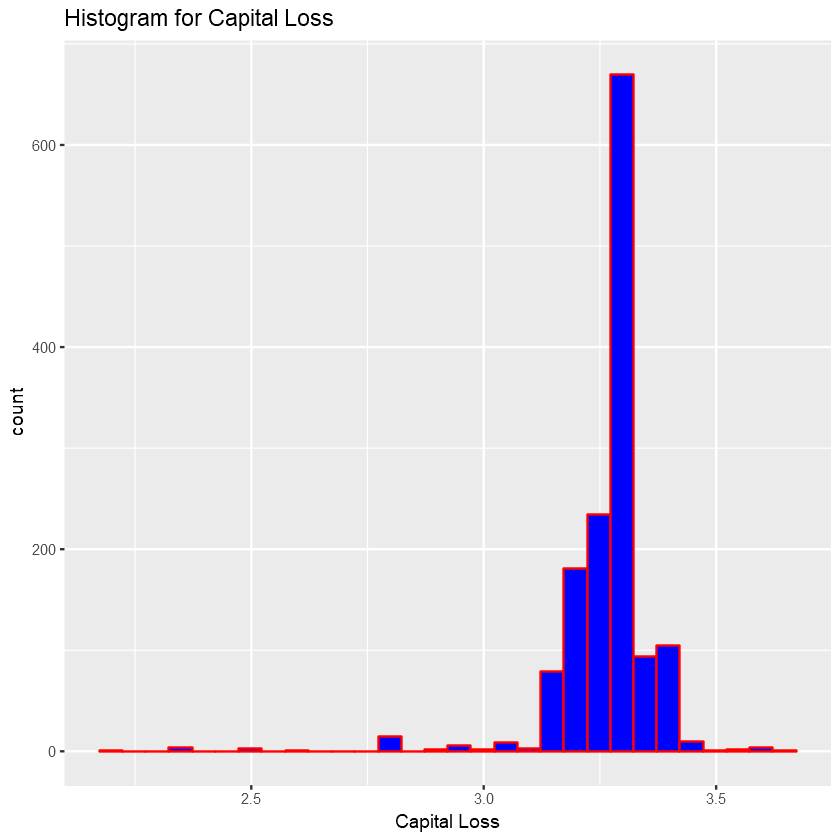

In [23]:
# 
loss_plot <- qplot(log10(adult$capital.loss),
      geom="histogram",  
      main = "Histogram for Capital Loss", 
      xlab = "Capital Loss",  
      fill=I("blue"), 
      col=I("red"))
loss_plot

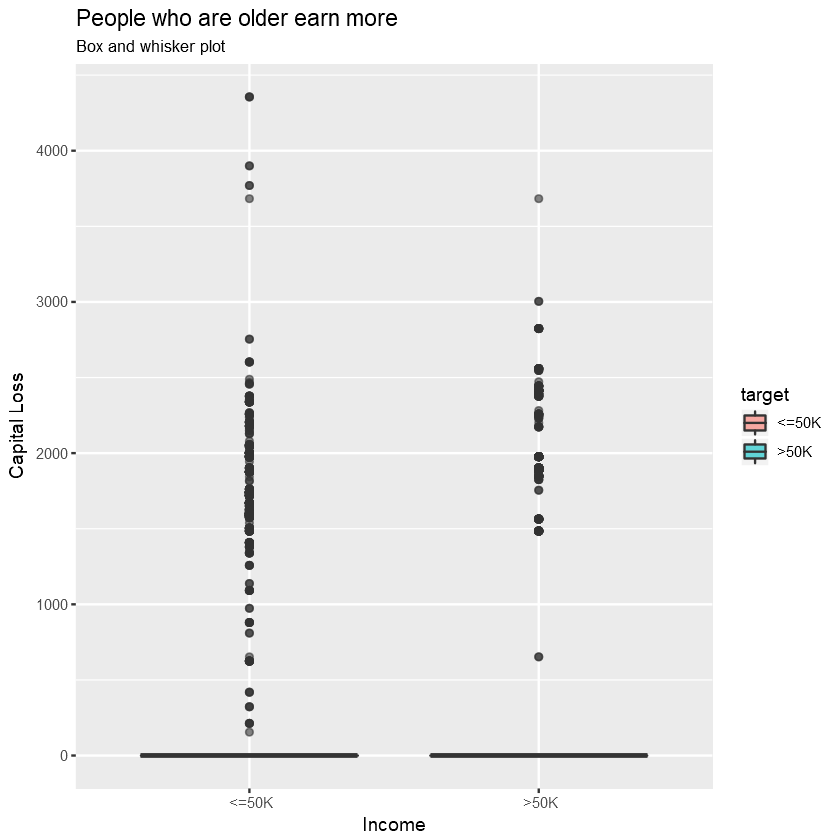

In [82]:
capital_loss_box <- ggplot(adult, aes(x = target, y = capital.loss, fill = target)) +
   geom_boxplot(alpha = 0.6) +
   labs(x = "Income", y = "Capital Loss", title = "People who are older earn more",
        subtitle = "Box and whisker plot")
capital_loss_box

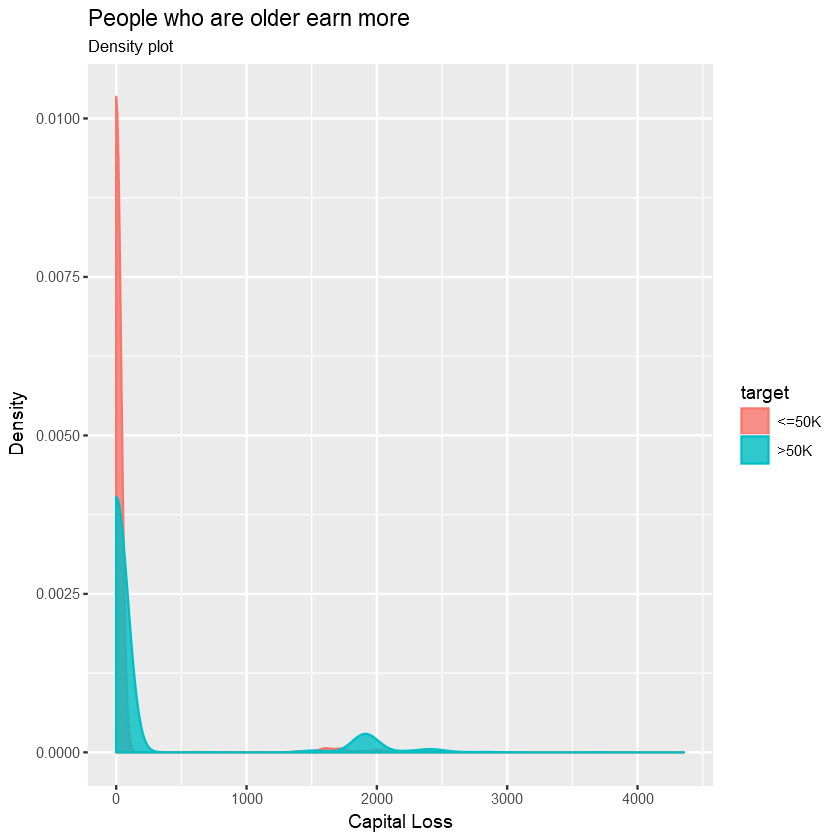

In [84]:
capital_loss_density <- ggplot(adult, aes(x = capital.loss, color = target, fill = target)) + geom_density(alpha = 0.8) +
   labs(x = "Capital Loss", y = "Density", title = "People who are older earn more",
        subtitle = "Density plot")
capital_loss_density

####  **Capital Gain**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


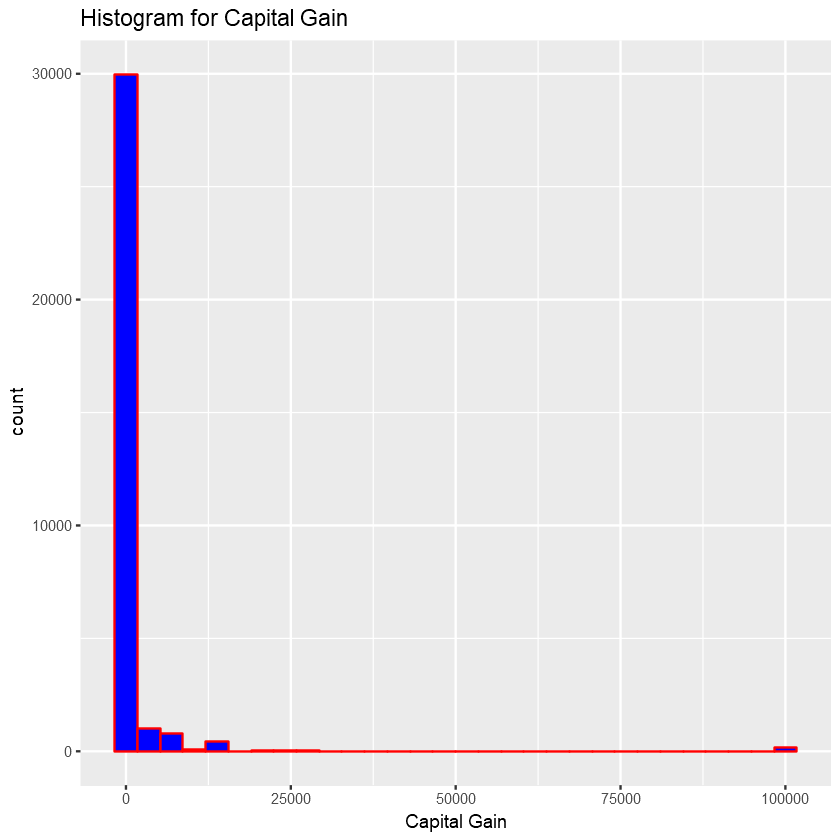

In [85]:
gain_plot <- qplot(adult$capital.gain,
      geom="histogram",  
      main = "Histogram for Capital Gain", 
      xlab = "Capital Gain",
      fill=I("blue"), 
      col=I("red"))
gain_plot

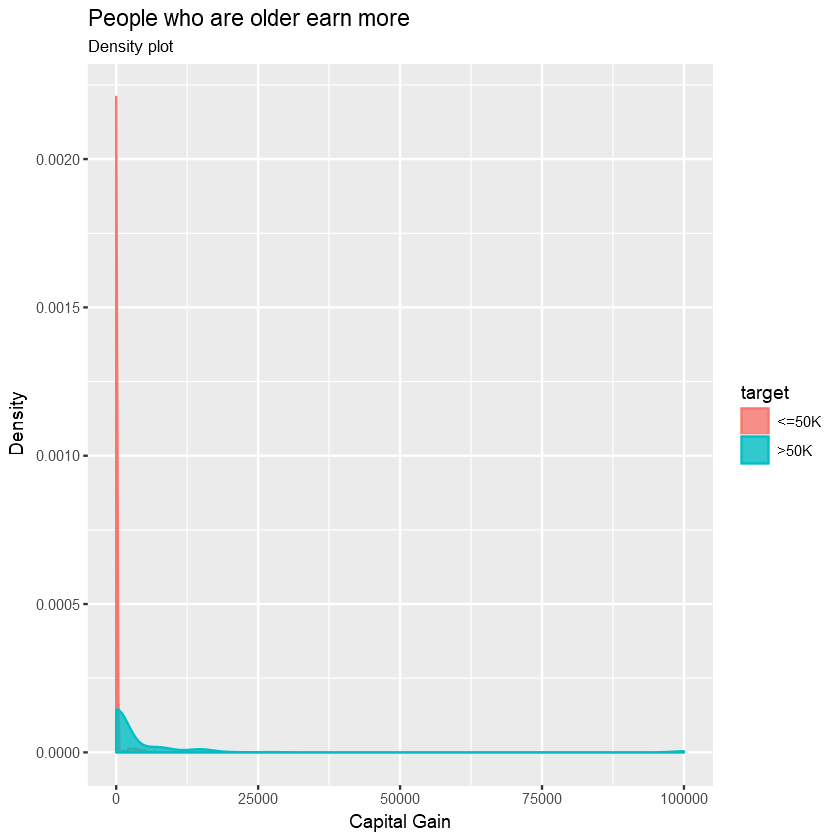

In [86]:
capital_gain_density <- ggplot(adult, aes(x = capital.gain, color = target, fill = target)) + geom_density(alpha = 0.8) +
   labs(x = "Capital Gain", y = "Density", title = "People who are older earn more",
        subtitle = "Density plot")
capital_gain_density

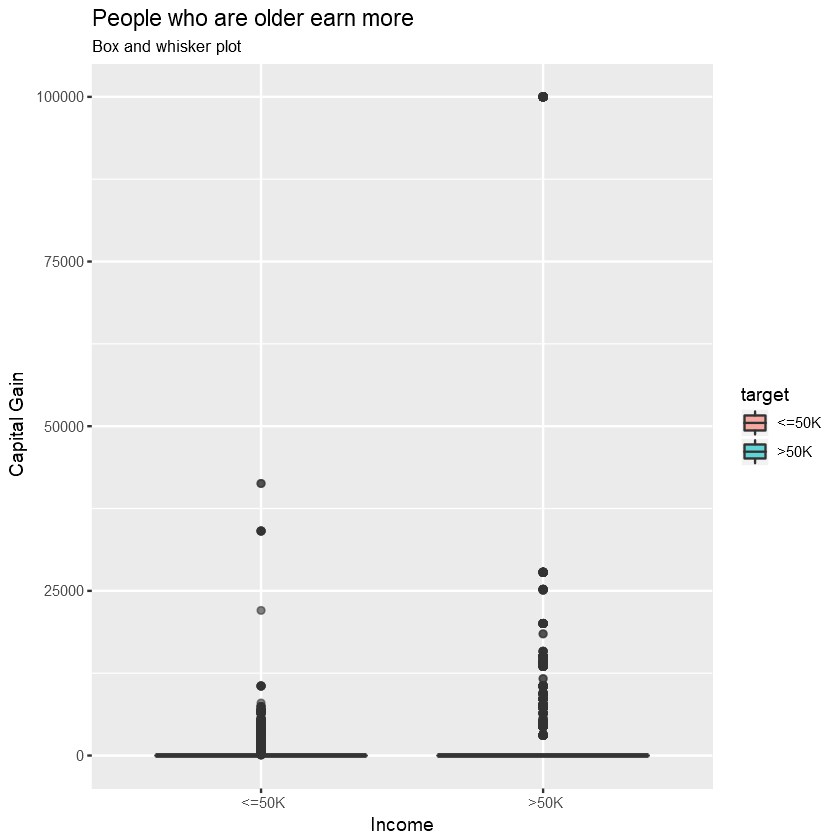

In [88]:
capital_gain_box <- ggplot(adult, aes(x = target, y = capital.gain, fill = target)) +
   geom_boxplot(alpha = 0.6) +
   labs(x = "Income", y = "Capital Gain", title = "People who are older earn more",
        subtitle = "Box and whisker plot")
capital_gain_box

From the two plots we conclude that the capital loss and the capital gain **may not be useful for classification** as they are quite skewed and mostly concentrated at zero value

#### **Hours per.Week**

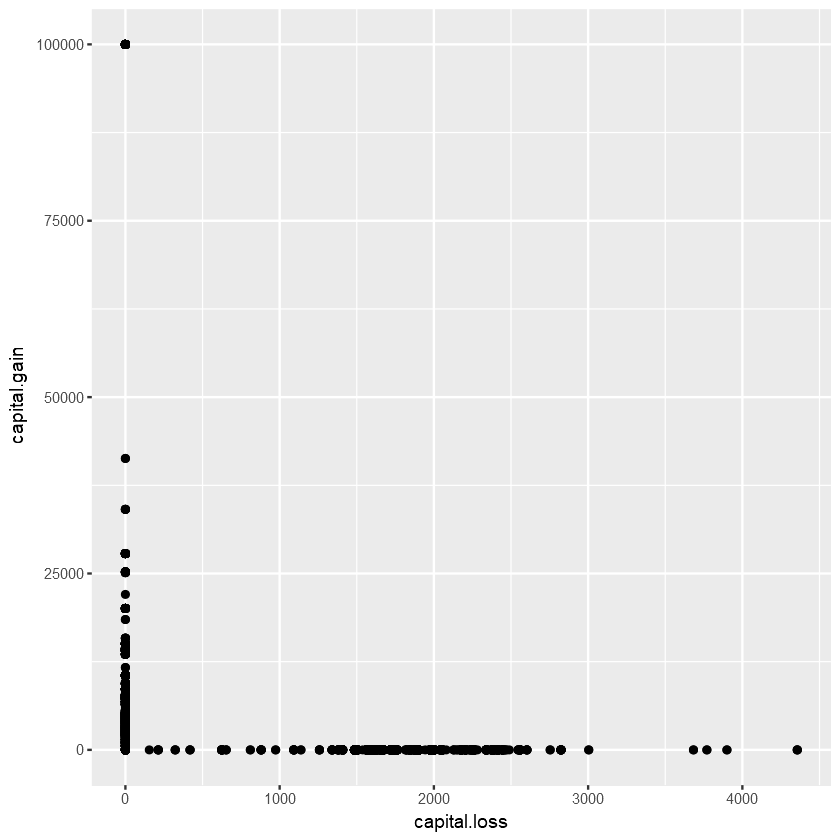

In [37]:
ggplot(adult, aes(x=capital.loss, y=capital.gain)) + geom_point() #capital.loss

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


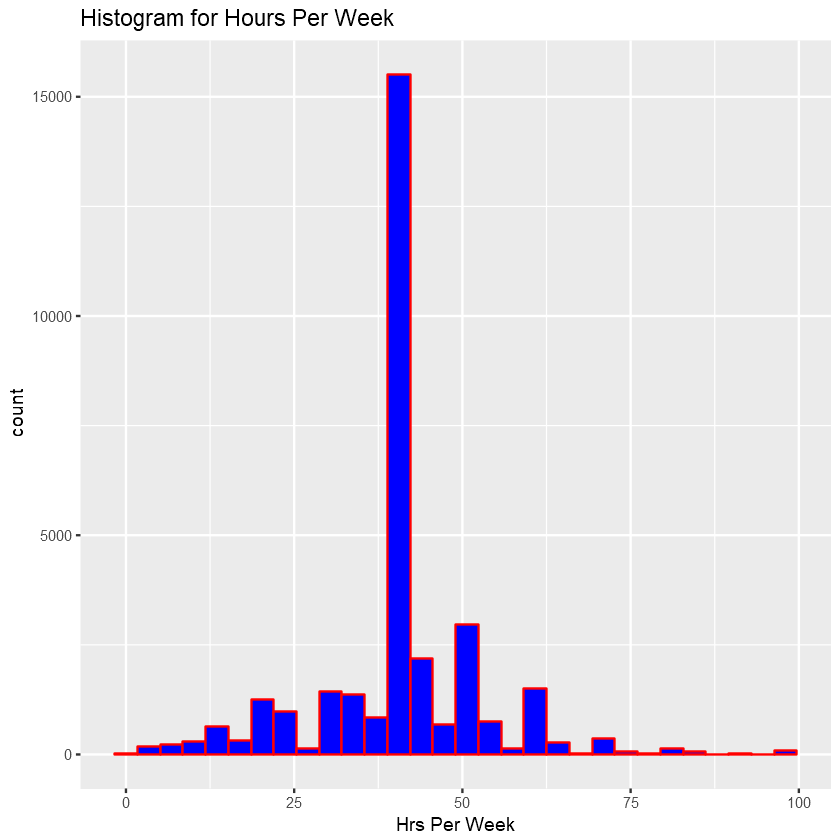

In [89]:
qplot(adult$hours.per.week,
      geom="histogram",  
      main = "Histogram for Hours Per Week", 
      xlab = "Hrs Per Week",  
      fill=I("blue"), 
      col=I("red"))

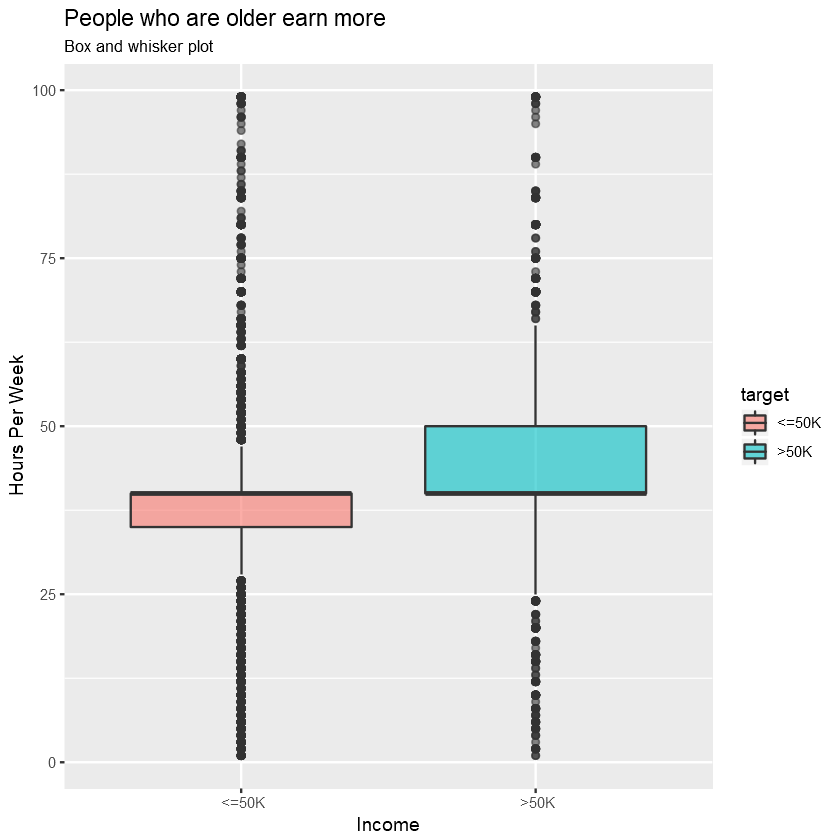

In [90]:
hours.per.week_box <- ggplot(adult, aes(x = target, y = hours.per.week, fill = target)) +
   geom_boxplot(alpha = 0.6) +
   labs(x = "Income", y = "Hours Per Week", title = "People who are older earn more",
        subtitle = "Box and whisker plot")
hours.per.week_box

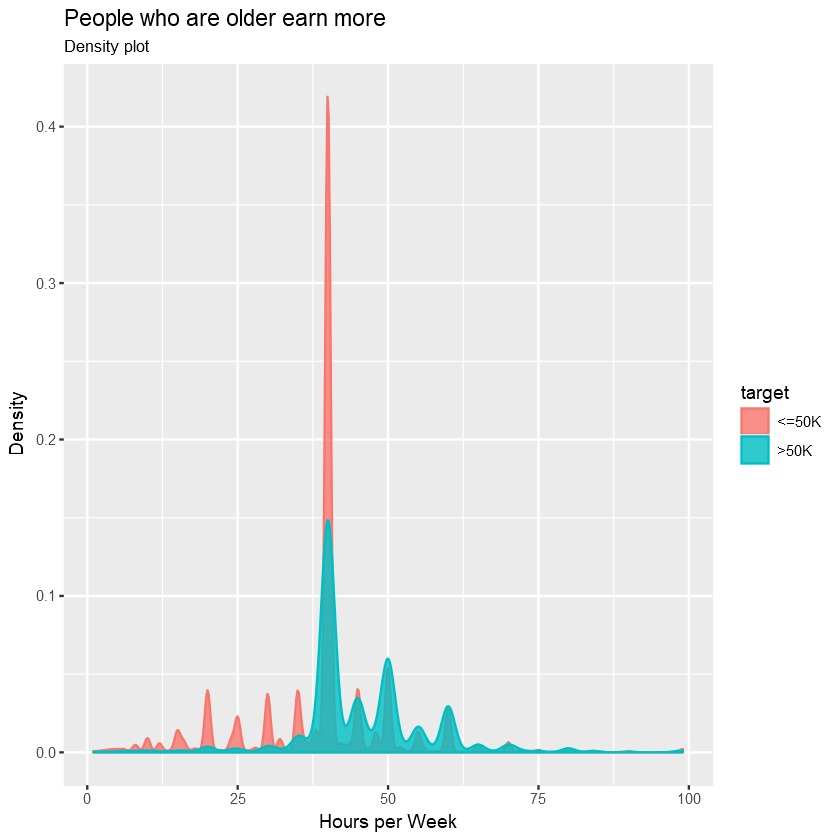

In [92]:
hours_per_week_density <- ggplot(adult, aes(x = hours.per.week, color = target, fill = target)) + 
geom_density(alpha = 0.8) +
   labs(x = "Hours per Week", y = "Density", title = "People who are older earn more",
        subtitle = "Density plot")
hours_per_week_density

#### **Education Num**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


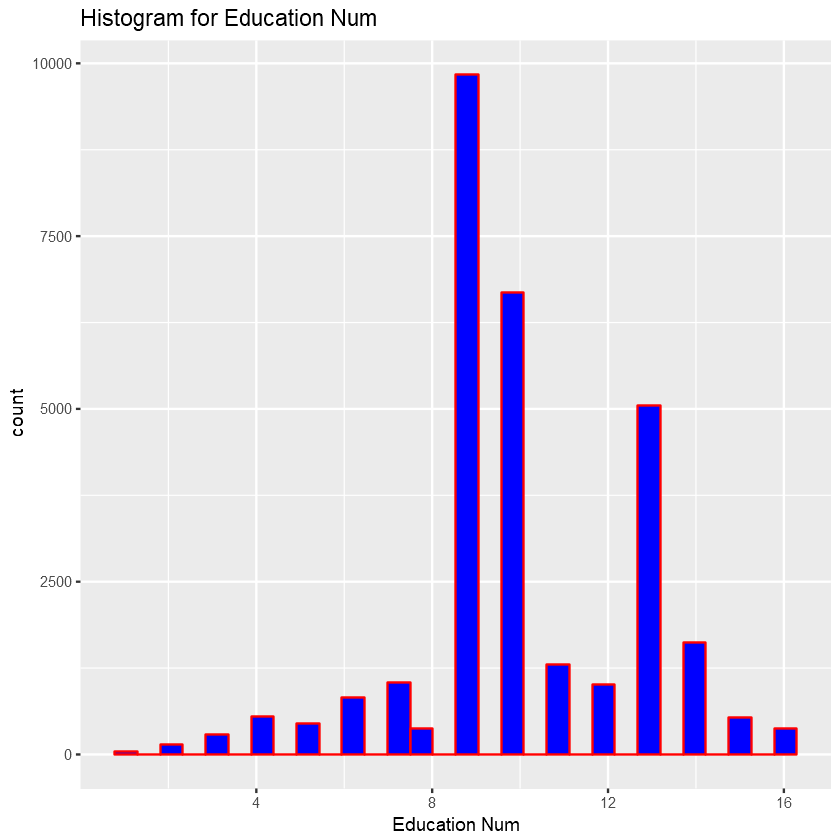

In [26]:
qplot(adult$education.num,
      geom="histogram",  
      main = "Histogram for Education Num", 
      xlab = "Education Num",  
      fill=I("blue"), 
      col=I("red"))

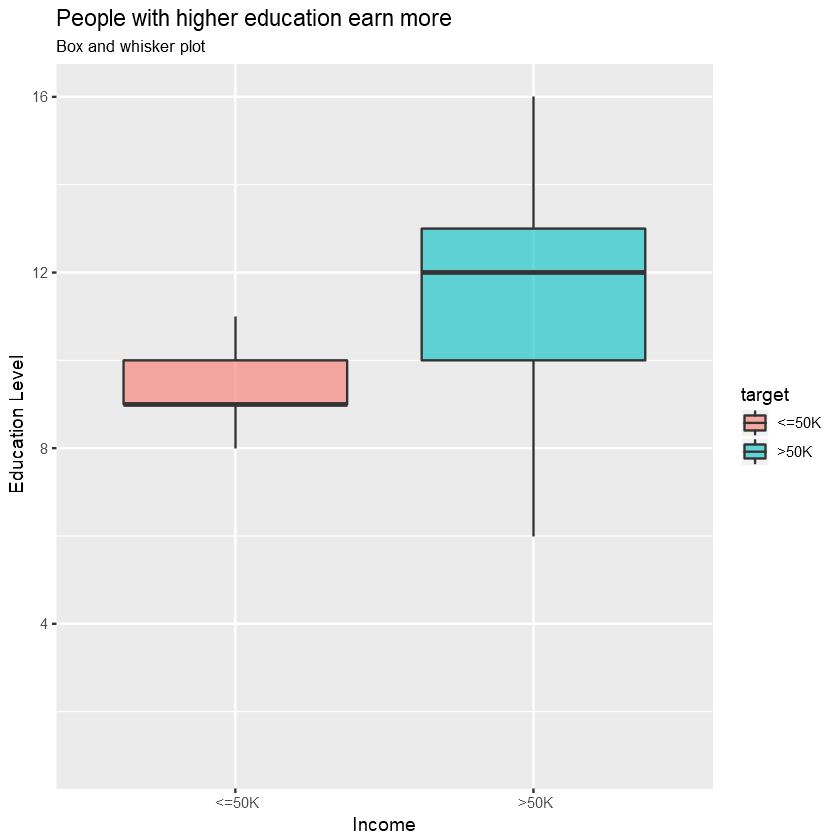

In [66]:
education_num_box <- ggplot(adult, aes(x = target, y = education.num, fill = target)) +
   geom_boxplot(alpha = 0.6,outlier.shape = NA) +
   labs(x = "Income", y = "Education Level", title = "People with higher education earn more",
        subtitle = "Box and whisker plot")
education_num_box

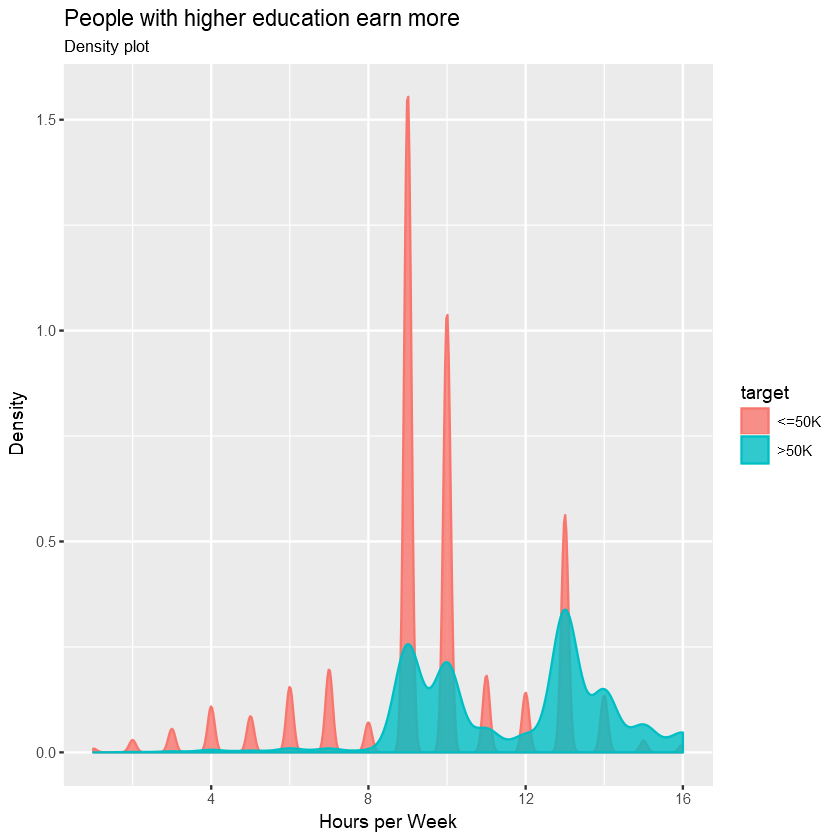

In [64]:
education_num_density <- ggplot(adult, aes(x = education.num, color = target, fill = target)) + 
geom_density(alpha = 0.8) +
   labs(x = "Hours per Week", y = "Density", title = "People with higher education earn more",
        subtitle = "Density plot")
education_num_density

#### **Final Weight**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


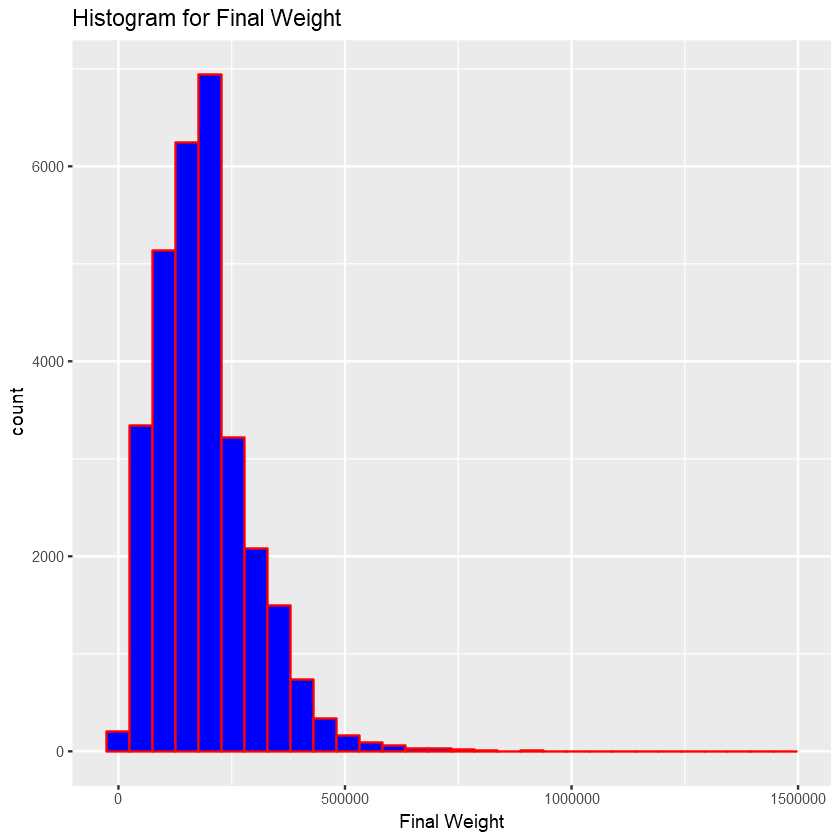

In [27]:
qplot(adult$fnlwgt,
      geom="histogram",  
      main = "Histogram for Final Weight", 
      xlab = "Final Weight",  
      fill=I("blue"), 
      col=I("red"))

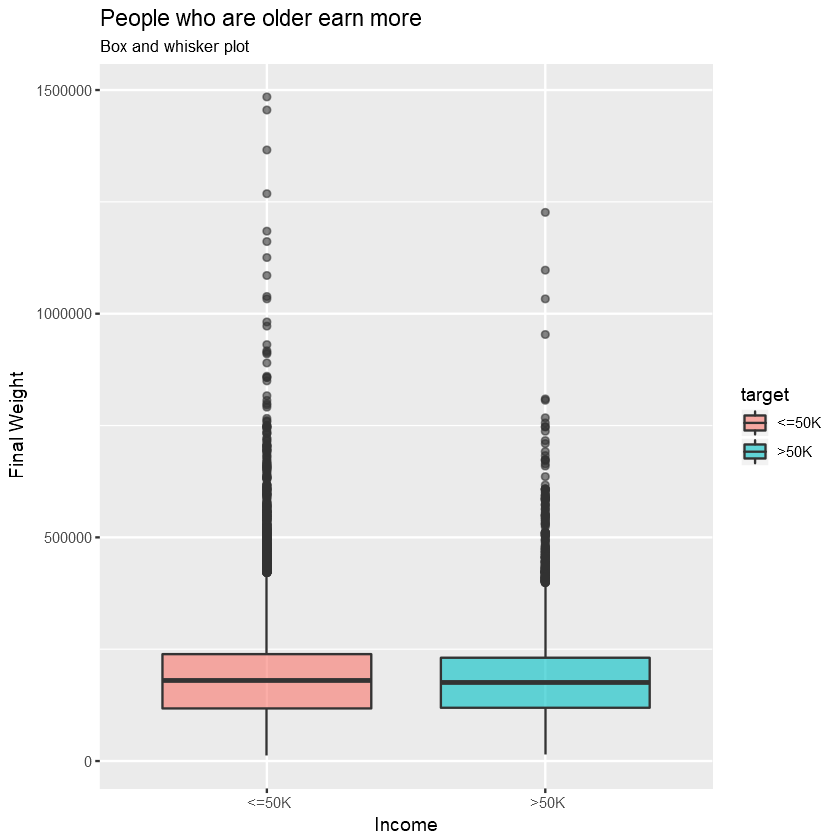

In [97]:
final_weight_box <- ggplot(adult, aes(x = target, y = fnlwgt, fill = target)) +
   geom_boxplot(alpha = 0.6) +
   labs(x = "Income", y = "Final Weight", title = "People who are older earn more",
        subtitle = "Box and whisker plot")
final_weight_box

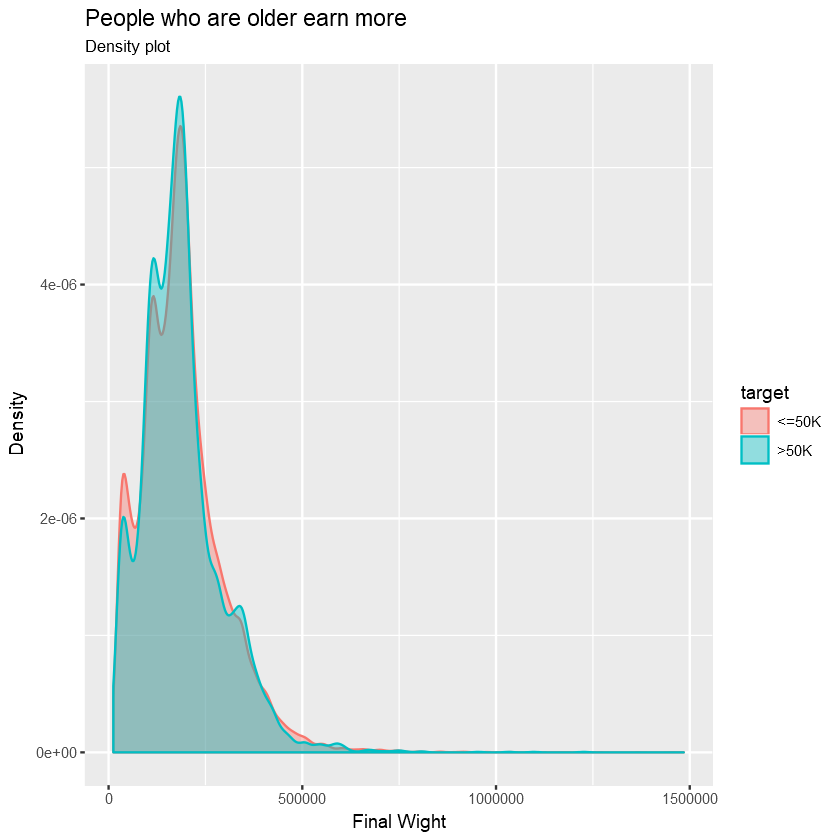

In [31]:
final_weight_density <- ggplot(adult, aes(x = fnlwgt, color = target, fill = target)) + 
geom_density(alpha = 0.4) +
   labs(x = "Final Wight", y = "Density", title = "People who are older earn more",
        subtitle = "Density plot")
final_weight_density

### *Categorical Features*

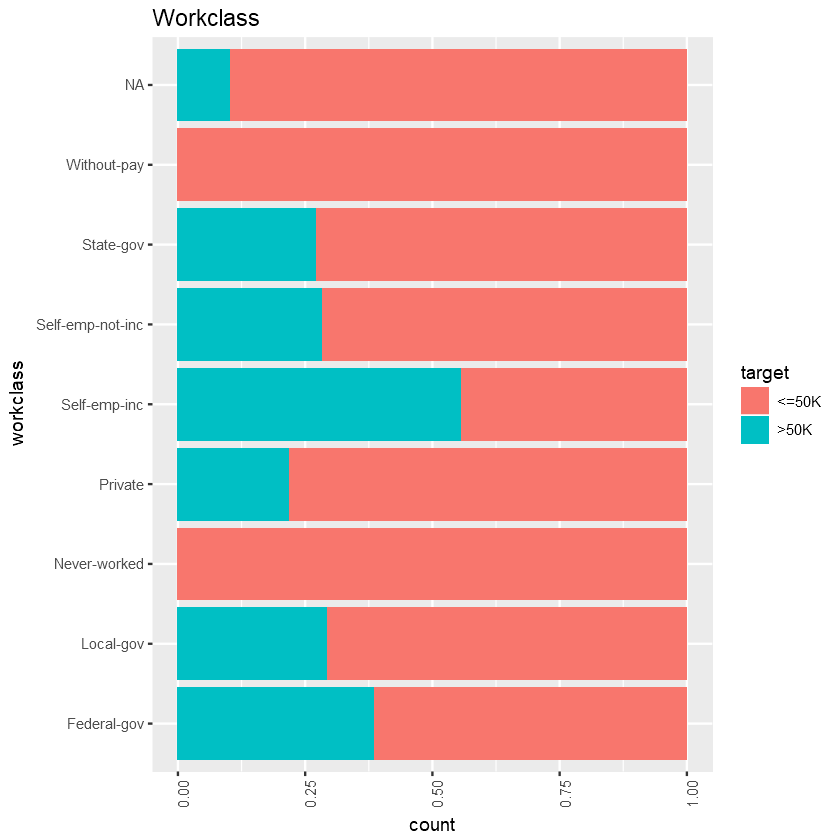

In [21]:
#workclass
workclass_bar <- ggplot(adult, aes(x = workclass, fill = target)) + geom_bar(position="fill") + 
coord_flip() + theme(axis.text.x = element_text(angle = 90)) + ggtitle("Workclass")

workclass_bar

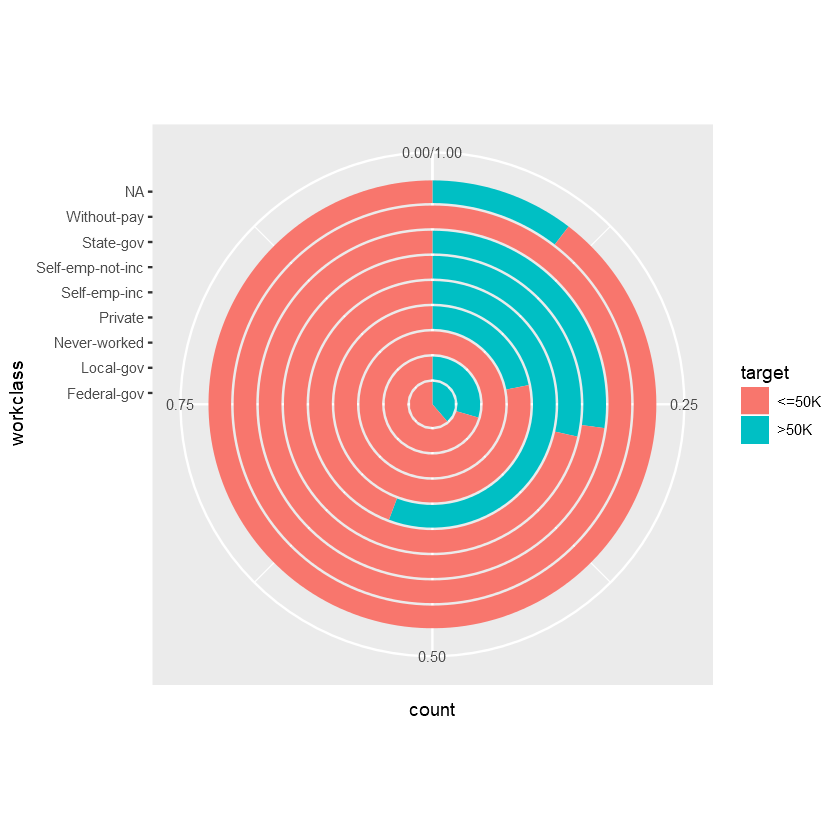

In [54]:
pie <- workclass_bar + coord_polar(theta = "y")
pie


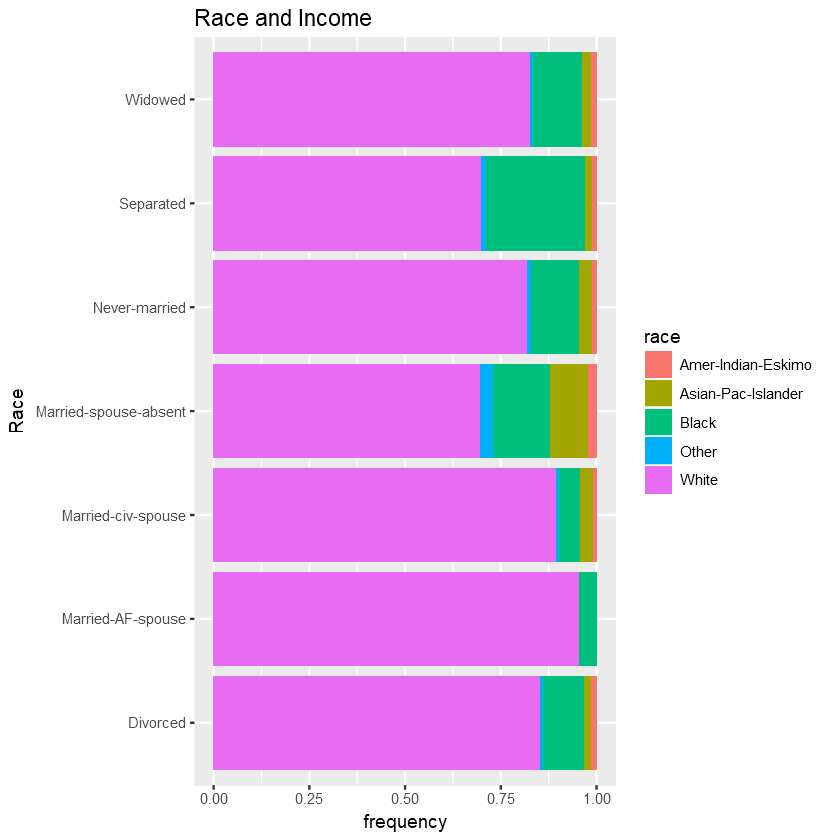

In [55]:
ggplot(adult, aes(marital.status, fill = race) ) +
  geom_bar(position = "fill")+ coord_flip() +
  ggtitle('Race and Income')+
  xlab('Race') +
  ylab('frequency')


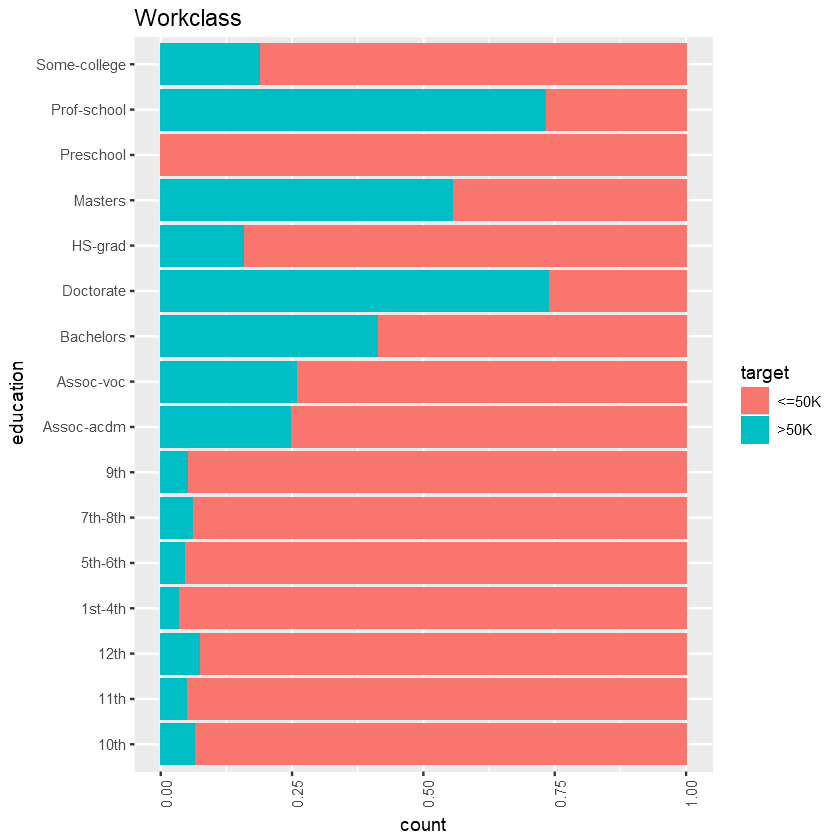

In [58]:
#Education
ggplot(adult, aes(x = education, fill = target)) + geom_bar(position="fill") +
 coord_flip() + theme(axis.text.x = element_text(angle = 90)) + ggtitle("Workclass")


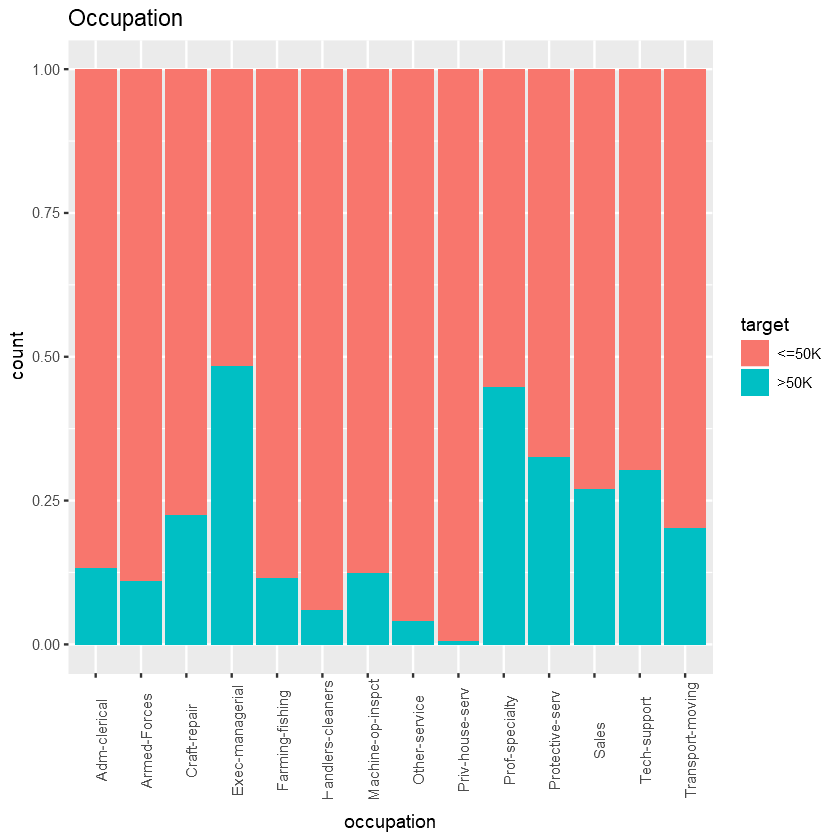

In [31]:
#occupation
ggplot(adult, aes(x = occupation, fill = target)) + geom_bar(position="fill") + 
theme(axis.text.x = element_text(angle = 90)) + ggtitle("Occupation")

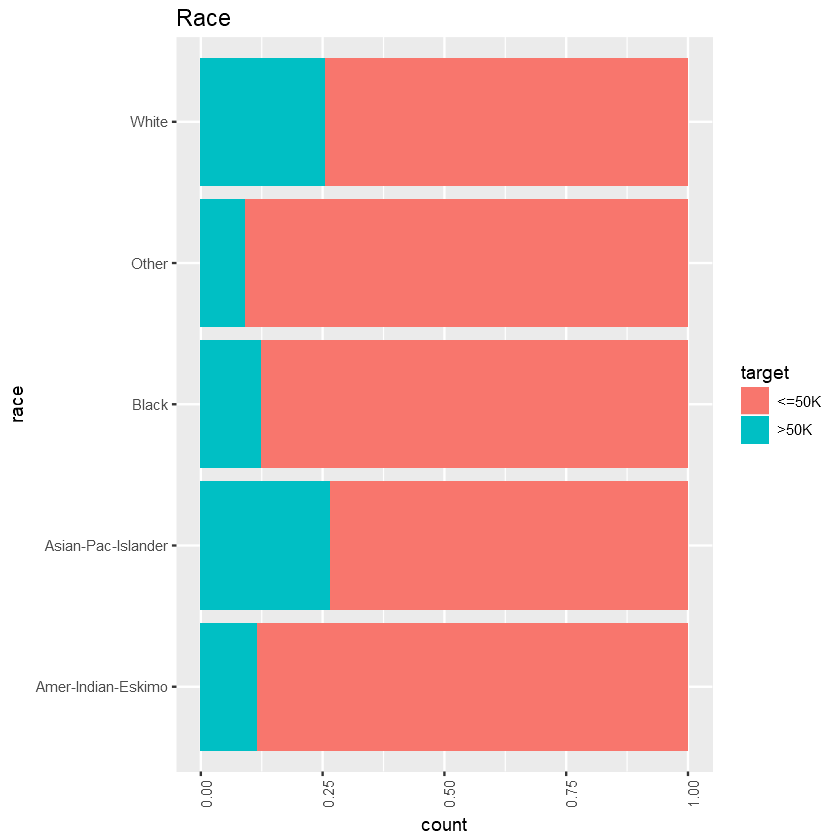

In [28]:
#race
ggplot(adult, aes(x = race, fill = target)) + geom_bar(position="fill") + coord_flip() +
theme(axis.text.x = element_text(angle = 90)) + ggtitle("Race")

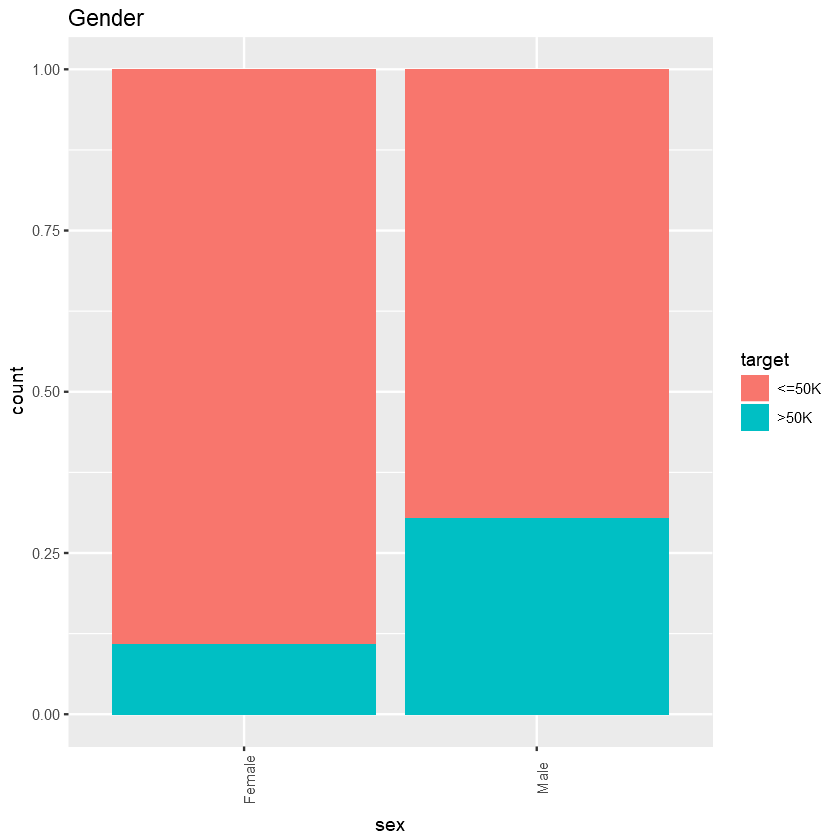

In [59]:
#sex
ggplot(adult, aes(x = sex, fill = target)) + 
geom_bar(position="fill") + theme(axis.text.x = element_text(angle = 90)) + ggtitle("Gender")

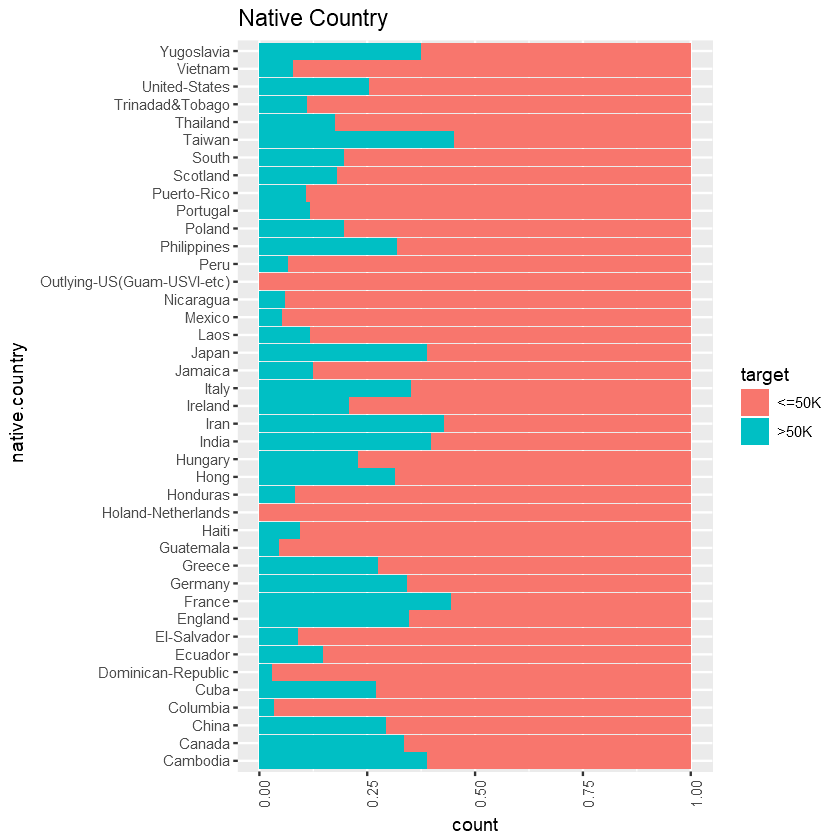

In [25]:
#native.country
ggplot(adult_omitted, aes(x = native.country, fill = target)) + geom_bar(position="fill") + coord_flip() +
theme(axis.text.x = element_text(angle = 90)) + ggtitle("Native Country")

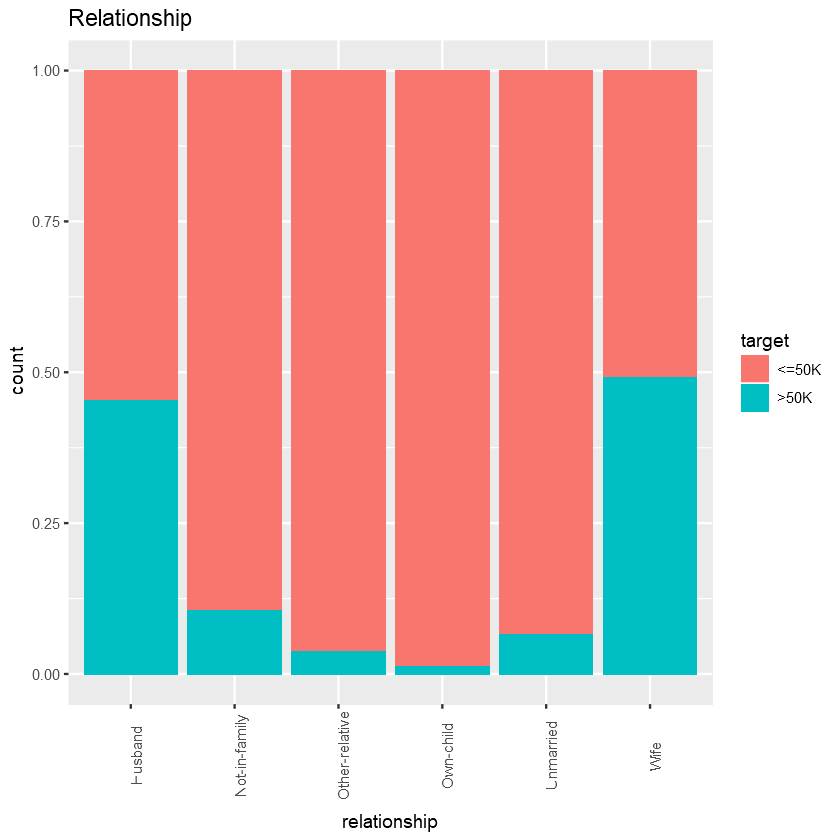

In [35]:
#relationship
ggplot(adult, aes(x = relationship, fill = target)) + geom_bar(position="fill") + 
theme(axis.text.x = element_text(angle = 90)) + ggtitle("Relationship")

## *Correlation between variables*

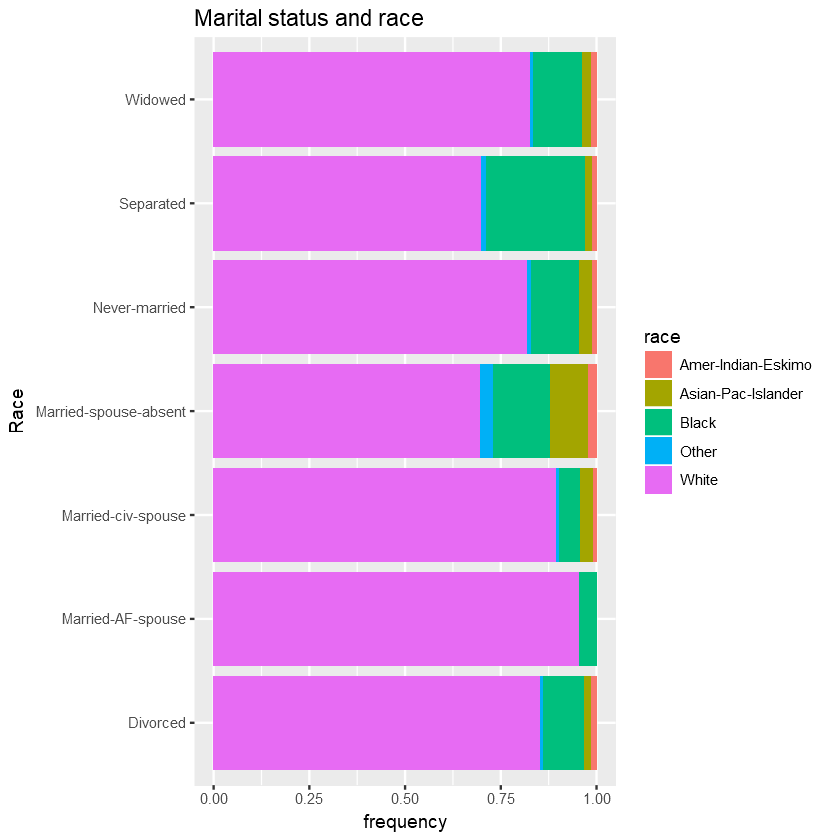

In [53]:
ggplot(adult, aes(marital.status, fill = race) ) +
  geom_bar(position = "fill")+ coord_flip() +
  ggtitle('Marital status and race')+
  xlab('Race') +
  ylab('frequency')


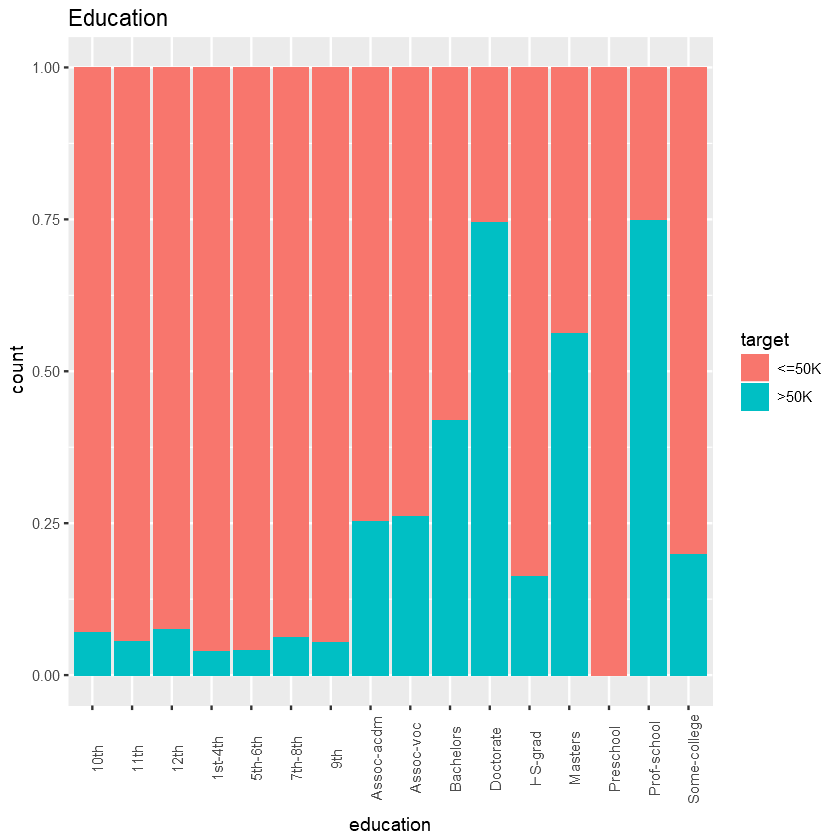

In [36]:
#education vs education.num
#Plotting education and education.num
ggplot(adult, aes(x = education, fill = target)) + geom_bar(position="fill") + 
theme(axis.text.x = element_text(angle = 90)) + ggtitle("Education")

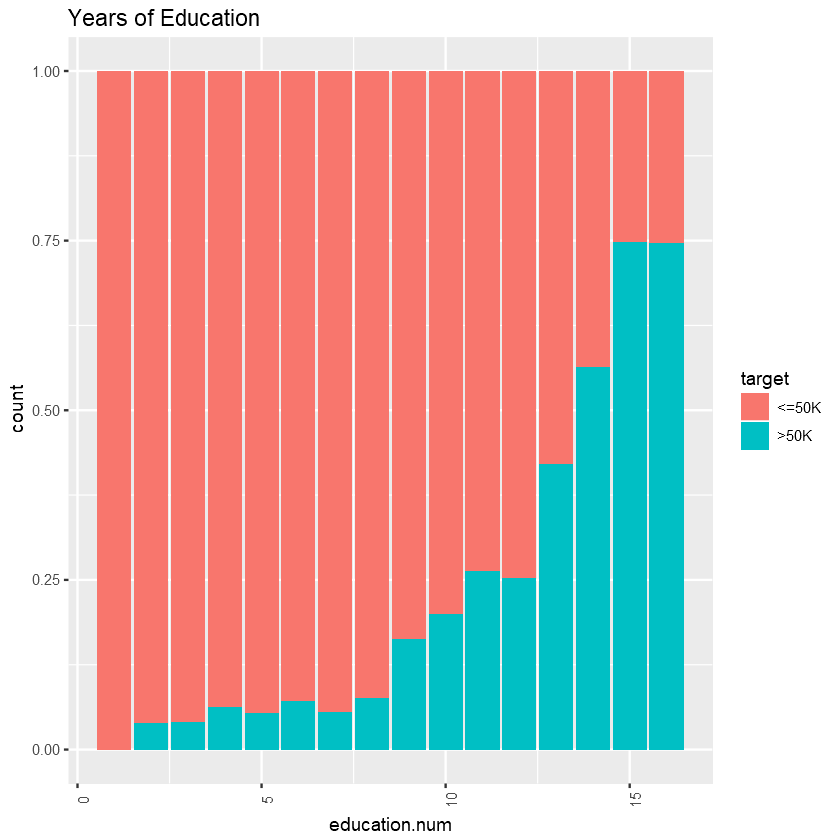

In [37]:
ggplot(adult, aes(x = education.num, fill = target)) + geom_bar(position="fill") + 
theme(axis.text.x = element_text(angle = 90)) + ggtitle("Years of Education")

In [38]:
#relationship vs sex
#ggplot(adult, aes(x = relationship, fill = sex)) + geom_bar(position="fill") + 
#theme(axis.text.x = element_text(angle = 90)) + ggtitle("Relationship and Gender")

In [39]:
adult$relationship <- combineLevels(adult$relationship, levs=c("Husband", "Wife"), "Spouse")

#relationship vs sex
ggplot(adult, aes(x = relationship, fill = sex)) + geom_bar(position="fill") +
theme(axis.text.x = element_text(angle = 90)) + ggtitle("Relationship and Gender")

Error: requested levels: " Husband Wife " are not in the legal list of factor levels:" "

ERROR: Error in combineLevels(adult$relationship, levs = c("Husband", "Wife"), : 


**Number male and female workers who have salaries greater than 50K**


Warning message:
"package 'bindrcpp' was built under R version 3.4.3"

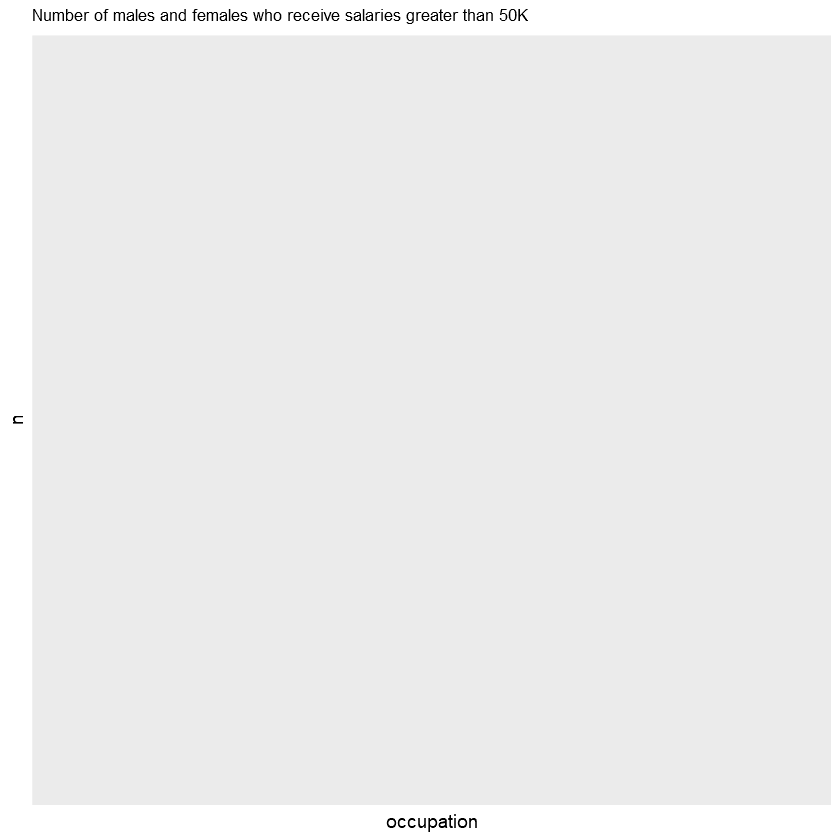

In [40]:
adult %>% select(sex,target,occupation) %>% mutate(income_binary=ifelse(target=='>50K',"Yes","No"))%>% filter(income_binary=='Yes') %>%
  group_by(occupation,sex) %>% summarise(n=n()) %>%
  ggplot(aes(x=occupation,y=n,fill=sex))+
  geom_bar(position='dodge',stat='identity')+
  ggtitle("Number of males and females who receive salaries greater than 50K")+
  theme(plot.title=element_text(size=10),axis.text.x=element_text(angle=90,vjust=1))

**Mean number of working hours per week for each gender**


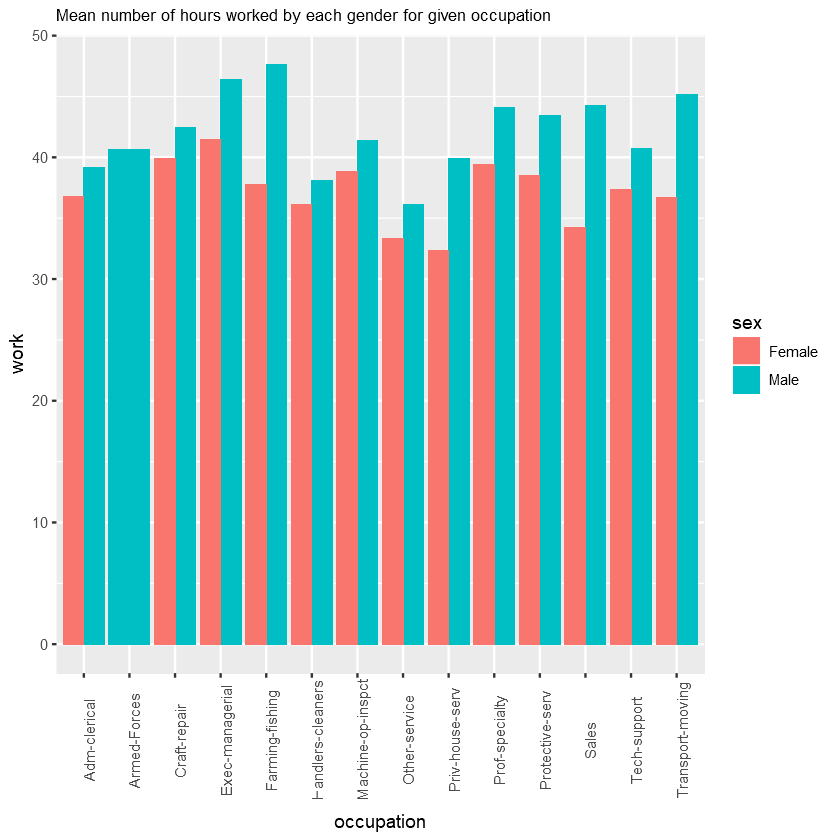

In [41]:
adult %>% select(sex,occupation,hours.per.week) %>% group_by(sex,occupation) %>% 
  summarise(work=mean(hours.per.week,na.rm=T)) %>%
  ggplot(aes(x=occupation, y=work, fill=sex)) +
  geom_bar(position="dodge",stat='identity')+
  ggtitle("Mean number of hours worked by each gender for given occupation")+
  theme(plot.title=element_text(size=10),axis.text.x = element_text(angle=90, vjust=1))

**Number of workers of each gender in each occupation**

In [83]:
adult %>% select(sex,occupation) %>% group_by(occupation,sex) %>% summarise(n=n())%>%
  ggplot(aes(x=occupation,y=n,fill=sex))+
  geom_bar(position='dodge',stat='identity')+
  ggtitle("Number of each gender in each occupation")+
  theme(plot.title=element_text(size=10),axis.text.x=element_text(angle=90,vjust=1))

ERROR: Error in FUN(X[[i]], ...): object 'sex' not found


**Number of working hours per week by workclass**

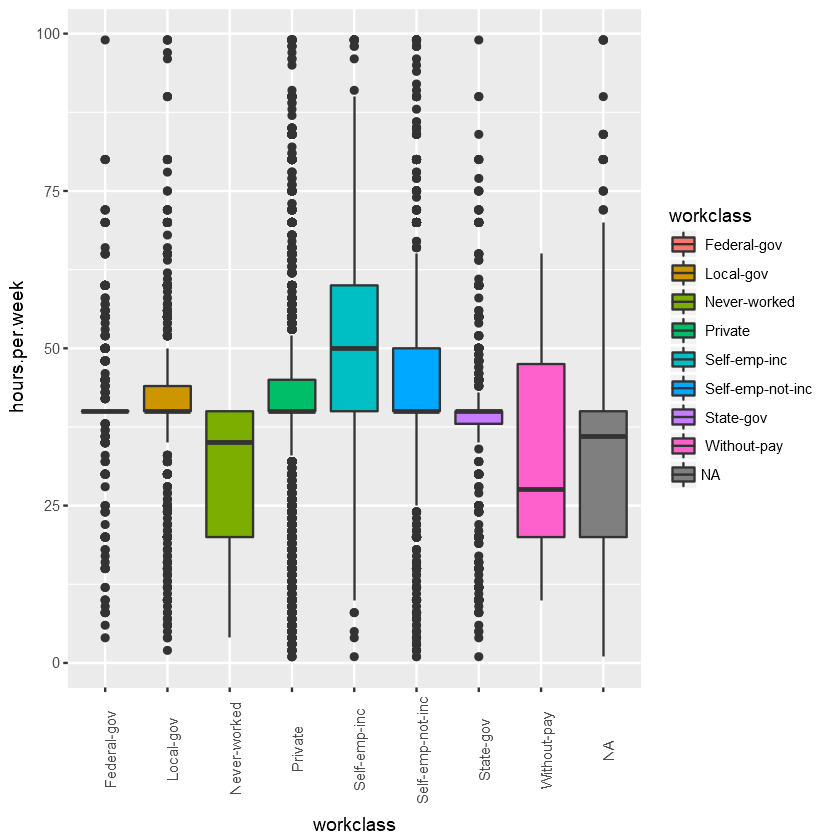

In [4]:
qplot(workclass, hours.per.week, data=adult_om, geom="boxplot", fill=workclass)+
  theme(plot.title=element_text(size=18),axis.text.x=element_text(angle=90,vjust=1))

In [46]:
countrycodes <- countrycode(adult$native.country, 'country.name', 'iso3c') 

Warning message in countrycode(adult$native.country, "country.name", "iso3c"):
"Some values were not matched unambiguously:  Columbia,  England,  Hong,  Scotland,  South,  Yugoslavia
"

In [16]:
#plot(adult$education.num, adult$education, main="Education vs Years of Education")

In [60]:
#https://www.kaggle.com/notaapple/detailed-exploratory-data-analysis-using-r

## *Hypothesis Testing*

## Classification

In [41]:
colnames(df)[14]<-'Country'
df3<-adult
cato<-c('sex')
for(each in cato){
  df3[,each]<-as.integer(df3[,each])
}
#model_df <- adult_omitted

ERROR: Error in `colnames<-`(`*tmp*`, value = c(NA, NA, NA, NA, NA, NA, NA, NA, : attempt to set 'colnames' on an object with less than two dimensions


In [20]:
library(caret)
set.seed(1)
#Partitioning data with respect to dependent variable income
train_ind <- createDataPartition(model_df$target, p= .8, list=FALSE)
training_set<-adult[train_ind,]
testing_set<-adult[-train_ind,]

In [22]:
library(rpart)
library(rpart.plot)
treeFit<- rpart(target~.,data=training_set,method = 'class')
print(treeFit)

n= 24131 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 24131 5809  <=50K (0.75927231 0.24072769)  
   2) relationship= Not-in-family, Other-relative, Own-child, Unmarried 13224  886  <=50K (0.93300060 0.06699940)  
     4) capital.gain< 7073.5 12985  652  <=50K (0.94978822 0.05021178) *
     5) capital.gain>=7073.5 239    5  >50K (0.02092050 0.97907950) *
   3) relationship= Husband, Wife 10907 4923  <=50K (0.54863849 0.45136151)  
     6) education= 10th, 11th, 12th, 1st-4th, 5th-6th, 7th-8th, 9th, Assoc-acdm, Assoc-voc, HS-grad, Preschool, Some-college 7639 2556  <=50K (0.66540123 0.33459877)  
      12) capital.gain< 5095.5 7236 2159  <=50K (0.70163074 0.29836926) *
      13) capital.gain>=5095.5 403    6  >50K (0.01488834 0.98511166) *
     7) education= Bachelors, Doctorate, Masters, Prof-school 3268  901  >50K (0.27570379 0.72429621) *


In [24]:
#rpart.plot(treeFit, box.col=c("red", "blue"))

In [24]:
Prediction_tree<- predict(treeFit, newdata = testing_set[-15],type = 'class')
TreeAcu<-confusionMatrix(Prediction_tree,testing_set$target)$overall[1]
TreeAcu

Accuracy 
0.8410439

### XGBoost

In [8]:
# get a boolean vector of training labels
adultLabels <- adult %>%
    select(target) %>% # get the column with the # of humans affected
    is.na() %>% # is it NA?
    magrittr::not() # switch TRUE and FALSE (using function from the magrittr package)

# check out the first few lines
head(adultLabels) # of our target variable
head(adult$target) # of the original column

target
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE


[1] " <=50K" " <=50K" " <=50K" " <=50K" " <=50K" " <=50K"

age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [23]:
sex <- model.matrix(~sex-1,head(adult))
workclass <- model.matrix(~workclass-1,head(adult_omitted)) 
workclass

,workclass Private,workclass Self-emp-not-inc,workclass State-gov
1,0,0,1
2,0,1,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0


In [ ]:
# select just the numeric columns
diseaseInfo_numeric <- diseaseInfo_humansRemoved %>%
    select(-Id) %>% # the case id shouldn't contain useful information
    select(-c(longitude, latitude)) %>% # location data is also in country data
    select_if(is.numeric) # select remaining numeric columns

# make sure that our dataframe is all numeric
str(diseaseInfo_numeric)